# Mini Projeto 1.



## 1) a 3) 

In [379]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
import numpy as np
from scipy.stats import norm
import scipy.stats
import itertools #importante para gerar todos os resultados possíveis!!

In [380]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\bruno\Downloads


In [381]:
dados = pd.read_csv('mediasMunicipioPorAno_.csv',encoding='latin-1',false_values=[';'])

In [382]:
dados.head()

,AnoLetivo,COC,OrdemSerie,Serie,DescriçaoSerie,OrdemMateria,Materia,DescriçaoMateria,MediadaSerie,a;;;;;;
0,2010,1,2,61,1ºAno,1,CIE,Ciencias,6.5,a;;;;;;
1,2010,1,2,61,1ºAno,2,GEO,Geografia,6.4,a;;;;;;
2,2010,1,2,61,1ºAno,3,HIS,História,6.4,a;;;;;;
3,2010,1,2,61,1ºAno,4,MAT,Matemática,6.5,a;;;;;;
4,2010,1,2,61,1ºAno,5,POR,Portugues,6.2,a;;;;;;


In [383]:
dados.MediadaSerie.describe()

count    1335.000000
mean        5.765318
std         1.224207
min         0.000000
25%         5.400000
50%         5.900000
75%         6.400000
max         9.000000
Name: MediadaSerie, dtype: float64

In [384]:
dados.Media = dados.MediadaSerie[(dados.MediadaSerie>0)&(dados.Serie!=88)&(dados.Serie!=89)&(dados.Serie!=87)].astype('float')

## 4) 

In [385]:
dados.Media.describe()

count    1086.000000
mean        6.047145
std         0.728932
min         0.800000
25%         5.600000
50%         6.000000
75%         6.500000
max         9.000000
Name: MediadaSerie, dtype: float64

In [386]:
faixa = np.arange(0,10,0.3)

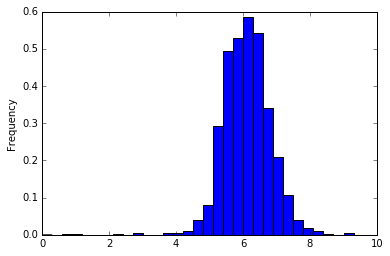

In [387]:
plot1 = dados.Media.plot(kind='hist',normed=1,bins=faixa)

** A distribuição das medias escolares das series do rio de janeiro entre 2010 e 2013, de acordo com esse histograma, pode ser classificada como uma distribuição assimétrica negativa, pois tem uma calda à direita que deixa a curva assimétrica. Ao mesmo tempo é possível inferir que a distribuição é normal, vejamos abaixo qual modelo cabe melhor á variável escolhida. **

## 5)
** A partir do "describe" dos dados, éh possivel estimar os valores de mi e sigma para a distribuição normal, que são 6.0 e 0.7, respectivamente **

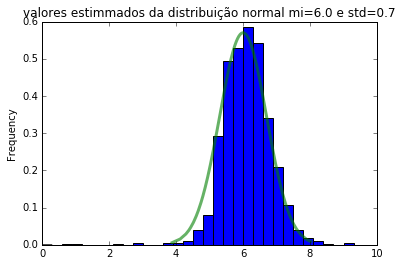

In [388]:
mu_norm = 6.
std_norm =0.7
x=sorted(stats.norm.rvs(size=1000, loc=mu_norm, scale=std_norm))
plot2 = dados.Media.plot(kind='hist',bins=faixa,normed=1)
plt.plot(x, stats.norm.pdf(x, loc=mu_norm, scale=std_norm), lw=3, alpha=0.6)
plt.title('valores estimmados da distribuição normal mi=6.0 e std=0.7')
plt.show()



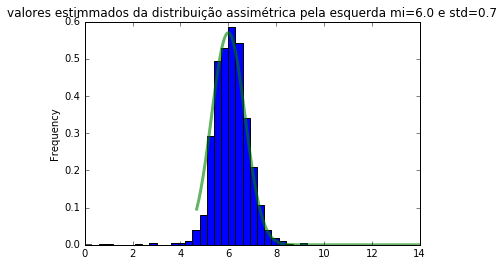

In [389]:
mu_gumbel = 6
std_gumbel =0.7
x=sorted(stats.gumbel_r.rvs(size=1000, loc=mu_gumbel, scale=std_gumbel))
plot2 = dados.Media.plot(kind='hist',bins=faixa,normed=1)
plt.plot(x, stats.norm.pdf(x, loc=mu_gumbel, scale=std_gumbel), lw=3, alpha=0.6)
plt.title('valores estimmados da distribuição assimétrica pela esquerda mi=6.0 e std=0.7')

plt.show()


## 6) e 7)

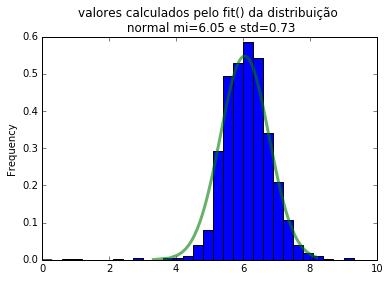

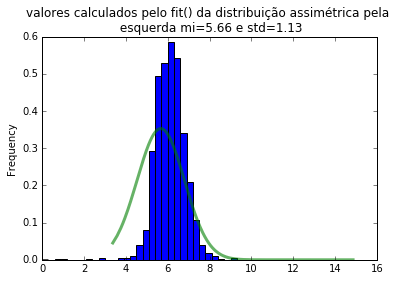

In [390]:
mu_norm_fit,std_norm_fit=stats.norm.fit(dados.Media)
mu_gumbel_fit,std_gumbel_fit=stats.gumbel_r.fit(dados.Media)

x=sorted(stats.norm.rvs(size=1000, loc=mu_norm_fit, scale=std_norm_fit))
plot2 = dados.Media.plot(kind='hist',bins=faixa,normed=1)
plt.plot(x, stats.norm.pdf(x, loc=mu_norm_fit, scale=std_norm_fit), lw=3, alpha=0.6)
plt.title('valores calculados pelo fit() da distribuição \n normal mi={0} e std={1}'.format(mue.round(decimals=2),stde.round(decimals=2)))

plt.show()

x=sorted(stats.gumbel_r.rvs(size=1000, loc=mu_gumbel_fit, scale=std_gumbel_fit))
plot2 = dados.Media.plot(kind='hist',bins=faixa,normed=1)
plt.plot(x, stats.norm.pdf(x, loc=mu_gumbel_fit, scale=std_gumbel_fit), lw=3, alpha=0.6)
plt.title('valores calculados pelo fit() da distribuição assimétrica pela \n esquerda mi={0} e std={1}'.format(mie.round(decimals=2),sigmae.round(decimals=2)))
plt.show()

** Para a distribuição normal o valor do fit() parece mais apropriado, por outro lado, o valor estimado do da distribuição de gumbel é mais apropriado. **

## 8)

In [391]:
Media = pd.Series(data=sorted(dados.Media))

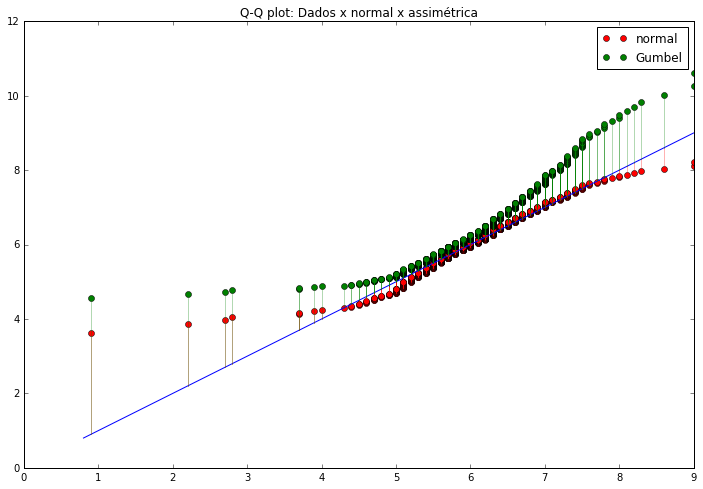

In [392]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(Media)):
    acc = (i - 0.5) / len(Media)
    if acc < 0:
        acc = 0
    fra.append(acc) 

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_norm = stats.norm.ppf(fra, scale=std_norm_fit,loc=mu_norm_fit) # quantis teóricos da normal
q_gumbel = stats.gumbel_r.ppf(fra, scale=std_gumbel, loc=mu_gumbel)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x normal x assimétrica")

norm_plot, = plt.plot(Media, q_norm, 'o', color="red", label="normal")
gumbel_plot, = plt.plot(Media, q_gumbel, 'o', color="green", label = "Gumbel")

plt.legend(handles=[norm_plot, gumbel_plot])
plt.plot((min(Media), max(Media)), (min(Media), max(Media)), '-')


for i in range(len(Media)):
    plt.plot((Media[i], Media[i]), (q_norm[i], Media[i]), '-', color='red', alpha=0.3  )
    plt.plot((Media[i], Media[i]), (q_gumbel[i], Media[i]), '-', color='green', alpha=0.3  )

** Comparando os QQ plot, a distribuição normal parece mais apropriada. **

## 9)

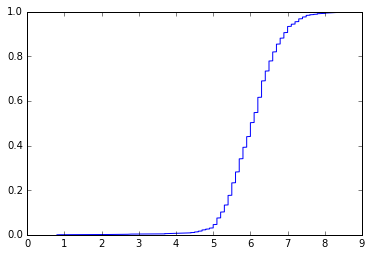

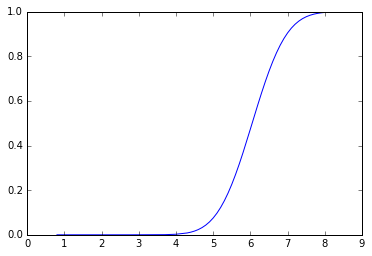

In [401]:
plt.plot(Media,fra)
plt.show()
plt.plot(Media,stats.norm.cdf(Media, scale=std_norm_fit,loc=mu_norm_fit))

In [409]:
erro_quadratico_exponencial = sum((Media - q_norm)**2)
erro_quadratico_gamma = sum((Media - q_gumbel)**2)

print("Erro quadrático da exponencial :{:4.3f}\n".format(erro_quadratico_exponencial))
print("Erro quadrático da gamma :{:4.3f}\n".format(erro_quadratico_gamma)) 

[       -inf  3.63281927  3.86645091 ...,  8.03199073  8.11162758
  8.22784007]
Erro quadrático da exponencial : inf

Erro quadrático da gamma : inf

